In [649]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

The datasets was provide all number write by hand.

In [650]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))
print(len(x_test))
print(x_train[0].shape)

60000
10000
(28, 28)


Mark all datasets to be numpy arrays.

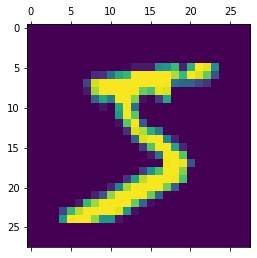

In [651]:
import matplotlib.pyplot as plt

plt.matshow(x_train[0])
# plt.imshow(x_train[0], cmap=plt.cm.binary)
# plt.show()

In [652]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
# x_train = x_train / 255
# x_test = x_test / 255


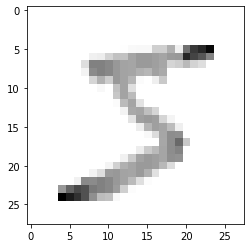

In [653]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
# print(x_train[0])

Scale the data to standardize of 1 or zero to model.

In [654]:
# this unuse for this project
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


Reshape 28*28 Black and White the data for Flatten

In [655]:
model  = tf.keras.models.Sequential()

In [656]:
# important for input layer use input_shape to resize the shape to 28x28
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

Add a input layer

In [657]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Add 3 hidden layer with 128 nodes that included the relu activation.

In [658]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Add a output layer with 10 (0-9) output and included softmax activation

In [659]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Settings for compile to prepare to training model

In [660]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2532 - accuracy: 0.9227
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1044 - accuracy: 0.9681
Epoch 3/3
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0725 - accuracy: 0.9776


Begin training the model with above all layers.

In [661]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.9738


Evaluate the model whether accuracy.

In [662]:
model.save("epic_num_reader.model")

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


Save the model to predict.

In [663]:
new_model = tf.keras.models.load_model("epic_num_reader.model")

Load the train model to predict the number.

In [664]:
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[4.29288294e-09 4.91917035e-06 3.83984552e-05 ... 9.99905109e-01
  2.00499827e-07 4.85847249e-06]
 [2.83413986e-08 1.17971135e-08 9.99994516e-01 ... 8.52197513e-09
  5.03459717e-07 1.29978694e-10]
 [8.41398347e-08 9.99764502e-01 3.39622093e-05 ... 1.10861467e-04
  3.09422976e-05 5.52859183e-06]
 ...
 [1.15029721e-07 2.31124477e-06 2.85700338e-07 ... 1.51175609e-05
  1.44407632e-05 3.45809203e-05]
 [1.26214559e-06 2.34278195e-05 3.30359831e-06 ... 6.79497361e-07
  1.76224345e-03 3.00100919e-06]
 [4.24485370e-06 1.03248956e-08 2.16035123e-09 ... 1.70870373e-10
  5.96146890e-07 1.16988741e-09]]


In [665]:
import numpy as np

print(np.argmax(predictions[0]))

7


Conversion the arrays to be a number.

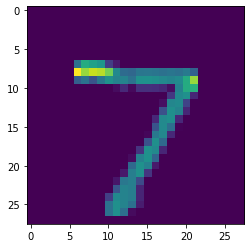

In [666]:
plt.imshow(x_test[0])
plt.show()

784
(28, 28)


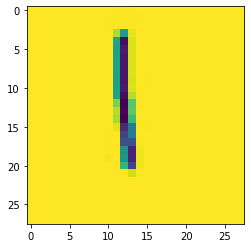

In [667]:
from PIL import Image

image = Image.open("number_1.jpg")
image = image.resize((28, 28))
image = image.convert("L")
image = np.asarray(image)

# image = cv2.imread('number_6_2.jpg')
# image = cv2.resize(image, dsize=(28, 28), 0)

# varify the share whether it was 28x28 size.
tf.ensure_shape(image, [28, 28])

print(image.size)
print(image.shape)
plt.imshow(image)
plt.show()

Try to load the sample to predict with the model which has saved in **epic_num_reader.model**

In [668]:
image = tf.keras.utils.normalize(image, axis=1)
predictions = new_model.predict([image])
y_predictions =  [np.argmax(i) for i in predictions]
print(y_predictions)

1/1 [==============================] - 0s 146ms/step
[0]
